<a href="https://colab.research.google.com/github/Arun28S12/Data-Science-Learning/blob/main/Outlier_Detection_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outlier Detection Techniques in Python

This notebook covers multiple techniques to detect outliers using statistical methods, machine learning, and domain knowledge. Each method includes explanations, real-life scenarios, and implementation with outputs.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

# Sample data: Blood Pressure readings
data = pd.DataFrame({'BloodPressure': [120, 122, 119, 118, 300, 121, 117]})
data

,BloodPressure
0,120
1,122
2,119
3,118
4,300
5,121
6,117


✅ **Categories of Outlier Detection Techniques**

- **Statistical Methods**
- **Visualization Methods**
- **Machine Learning-Based Methods**
- **Distance & Density-Based Methods**
- **Domain-Specific Logic**

### 1. Z-Score Method (Standard Score)

🔍 **Concept**  
Measures how many standard deviations a data point is from the mean.  
If **Z > 3** or **Z < -3**, it's considered an outlier.

✅ **When to Use**
- Data is normally distributed
- Dataset is moderate to large in size


###🧪 Code Example

In [ ]:
z_scores = np.abs(stats.zscore(data['BloodPressure']))
data['Z-Score'] = z_scores
data['Outlier_Z'] = z_scores > 3
data

### 🎯 Use Cases

1. **Healthcare**: Detect faulty readings from blood pressure sensors  
2. **Banking**: Identify unusually high loan disbursements  
3. **Retail**: Spot anomalies in daily sales figures


### 2. IQR (Interquartile Range) Method

  🔍 **Concept**  
  Outliers are points that fall outside the range:  
  **[Q1 - 1.5 × IQR, Q3 + 1.5 × IQR]**

  ✅ **When to Use**
    - Suitable for non-normal distributions  
    - Ideal for tabular data


###🧪 Code Example

In [3]:
Q1 = data['BloodPressure'].quantile(0.25)
Q3 = data['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['Outlier_IQR'] = (data['BloodPressure'] < lower_bound) | (data['BloodPressure'] > upper_bound)
data

,BloodPressure,Z-Score,Outlier_Z,Outlier_IQR
0,120,0.400207,False,False
1,122,0.368552,False,False
2,119,0.416034,False,False
3,118,0.431862,False,False
4,300,2.448723,False,True
5,121,0.384379,False,False
6,117,0.447689,False,False


## 3. Boxplot Visualization

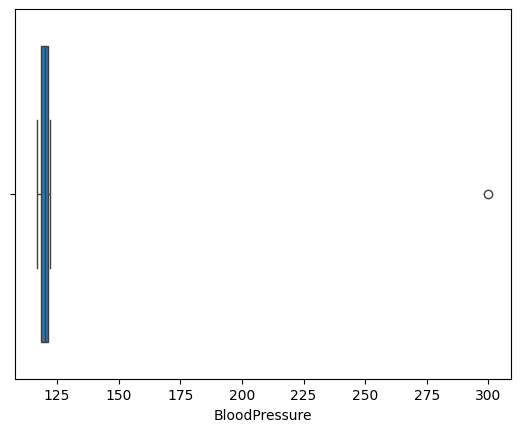

In [4]:
sns.boxplot(x=data['BloodPressure'])
plt.show()

## 4. Isolation Forest

In [5]:
model = IsolationForest(contamination=0.1, random_state=42)
data['IForest_Outlier'] = model.fit_predict(data[['BloodPressure']]) == -1
data

,BloodPressure,Z-Score,Outlier_Z,Outlier_IQR,IForest_Outlier
0,120,0.400207,False,False,False
1,122,0.368552,False,False,False
2,119,0.416034,False,False,False
3,118,0.431862,False,False,False
4,300,2.448723,False,True,True
5,121,0.384379,False,False,False
6,117,0.447689,False,False,False


## 5. DBSCAN

In [6]:
X_scaled = StandardScaler().fit_transform(data[['BloodPressure']])
db = DBSCAN(eps=1.5, min_samples=2).fit(X_scaled)
data['DBSCAN_Outlier'] = db.labels_ == -1
data

,BloodPressure,Z-Score,Outlier_Z,Outlier_IQR,IForest_Outlier,DBSCAN_Outlier
0,120,0.400207,False,False,False,False
1,122,0.368552,False,False,False,False
2,119,0.416034,False,False,False,False
3,118,0.431862,False,False,False,False
4,300,2.448723,False,True,True,True
5,121,0.384379,False,False,False,False
6,117,0.447689,False,False,False,False


## 6. Modified Z-Score

In [7]:
median_val = np.median(data['BloodPressure'])
mad = np.median(np.abs(data['BloodPressure'] - median_val))
data['Modified_Z'] = 0.6745 * (data['BloodPressure'] - median_val) / mad
data['Outlier_ModZ'] = np.abs(data['Modified_Z']) > 3.5
data

,BloodPressure,Z-Score,Outlier_Z,Outlier_IQR,IForest_Outlier,DBSCAN_Outlier,Modified_Z,Outlier_ModZ
0,120,0.400207,False,False,False,False,0.00000,False
1,122,0.368552,False,False,False,False,0.67450,False
2,119,0.416034,False,False,False,False,-0.33725,False
3,118,0.431862,False,False,False,False,-0.67450,False
4,300,2.448723,False,True,True,True,60.70500,True
5,121,0.384379,False,False,False,False,0.33725,False
6,117,0.447689,False,False,False,False,-1.01175,False


## 7. Local Outlier Factor (LOF)

In [8]:
lof = LocalOutlierFactor(n_neighbors=2)
data['LOF_Outlier'] = lof.fit_predict(data[['BloodPressure']]) == -1
data

,BloodPressure,Z-Score,Outlier_Z,Outlier_IQR,IForest_Outlier,DBSCAN_Outlier,Modified_Z,Outlier_ModZ,LOF_Outlier
0,120,0.400207,False,False,False,False,0.00000,False,False
1,122,0.368552,False,False,False,False,0.67450,False,False
2,119,0.416034,False,False,False,False,-0.33725,False,False
3,118,0.431862,False,False,False,False,-0.67450,False,False
4,300,2.448723,False,True,True,True,60.70500,True,True
5,121,0.384379,False,False,False,False,0.33725,False,False
6,117,0.447689,False,False,False,False,-1.01175,False,False


## 8. Domain-Based Rule

In [9]:
data['Domain_Outlier'] = data['BloodPressure'] > 180
data

,BloodPressure,Z-Score,Outlier_Z,Outlier_IQR,IForest_Outlier,DBSCAN_Outlier,Modified_Z,Outlier_ModZ,LOF_Outlier,Domain_Outlier
0,120,0.400207,False,False,False,False,0.00000,False,False,False
1,122,0.368552,False,False,False,False,0.67450,False,False,False
2,119,0.416034,False,False,False,False,-0.33725,False,False,False
3,118,0.431862,False,False,False,False,-0.67450,False,False,False
4,300,2.448723,False,True,True,True,60.70500,True,True,True
5,121,0.384379,False,False,False,False,0.33725,False,False,False
6,117,0.447689,False,False,False,False,-1.01175,False,False,False
